In [1]:
import pandas as pd
import numpy as np
import os
import config

In [2]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [3]:
has_colibactin = pd.read_csv(os.path.join(config.CLEAN_DIR, "has_colibactin.to_csv"), index_col=0)
has_colibactin = has_colibactin.loc[metadata.index]
has_colibactin

,Bins
Sample_ID,
magic.0001,False
magic.0004,False
magic.0006,True
magic.0007,True
magic.0008,False
...,...
magic.6595,False
magic.6597,False
magic.6598,False


In [4]:
all(has_colibactin.index == metadata.index)

True

In [5]:
metadata["has_colibactin"] = has_colibactin
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,has_colibactin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,False
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,False
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,True
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,True
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,False
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,False
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,False


In [6]:
times = [
"0",
"1",
"2",
"3",
"4",
"12",
"24",
"36",
"48",
"60",
"72",
"84",
"96",
]

In [7]:
for t in times:
    print(metadata[metadata["Timeline_Weeks"] == t]["has_colibactin"].mean())

0.2716049382716049
0.29900332225913623
0.40236686390532544
0.41304347826086957
0.28664495114006516
0.2841726618705036
0.34563758389261745
0.44642857142857145
0.3686131386861314
0.2465753424657534
0.2214765100671141
0.12195121951219512
0.20909090909090908


In [8]:
metadata["date_time"] = pd.to_datetime(metadata["Date_Collected"])
metadata = metadata[~metadata["date_time"].isna()]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,has_colibactin,date_time
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,False,2016-12-10
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,False,2016-12-15
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,True,2016-12-15
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,True,2016-12-15
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,False,2016-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,False,2021-08-22
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,False,2021-09-06
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,False,2021-08-23


In [9]:
for p in metadata["Patient_No"].unique():
    display(metadata[metadata["Patient_No"] == p].sort_values("date_time")[["date_time", "has_colibactin"]])
    input()

,date_time,has_colibactin
Sample_ID,,
magic.0001,2016-12-10,False
magic.0010,2016-12-10,False
magic.0004,2016-12-15,False
magic.0519,2017-06-11,False
magic.0859,2017-09-10,True
magic.1142,2017-12-11,True
magic.1388,2018-02-14,True
magic.1574,2018-02-28,True
magic.1781,2018-04-09,True


,date_time,has_colibactin
Sample_ID,,
magic.0006,2016-12-15,True
magic.0020,2016-12-21,False
magic.0018,2016-12-28,True
magic.0048,2017-01-04,True
magic.0078,2017-01-11,True
magic.0231,2017-03-14,True
magic.0527,2017-06-14,True
magic.0894,2017-09-19,True
magic.1115,2017-12-14,True


,date_time,has_colibactin
Sample_ID,,
magic.0007,2016-12-15,True
magic.0008,2016-12-15,False
magic.0012,2016-12-22,False
magic.0017,2016-12-28,False
magic.0044,2017-01-04,True
magic.0064,2017-01-11,False
magic.0228,2017-03-15,True
magic.0541,2017-06-14,False
magic.0880,2017-09-15,False


KeyboardInterrupt: Interrupted by user

In [10]:
df = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
df = df.T
df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,105,228,39403,925,170947,3011,2,163,4,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,1,144,23646,537,107325,726,1,62,1,0,...,0,0,0,0,0,0,0,0,0,0
magic.0010,3533,148,26439,2166,19611,28972,0,784,32,0,...,0,0,0,0,0,0,0,0,0,0
magic.0012,58,526,80131,1518,367871,2149,3,175,390,27,...,0,0,0,0,0,0,0,0,0,0
magic.0014,44507,15062,760790,5379,34244,5542,1,662,766,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,7,312,283,7,64,17,3,3,2,10,...,0,0,0,0,0,0,0,0,0,0
magic.6597,6,7,31,9,60,13,0,1,7,1,...,0,0,0,0,0,0,0,0,0,0
magic.6598,6,14,2493,43,219,83,0,12,12,1,...,0,0,0,0,0,0,0,0,0,1
magic.6599,7,8,1280,87,758,339,0,21,3,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
in_both = list(set(df.index) & set(metadata.index))

In [43]:
corr_df = df.loc[in_both]
corr_df["has_colibactin"] = metadata.loc[in_both]["has_colibactin"]
corr_df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,has_colibactin
magic.0447,1071,11,21855,4404,30618,4724,6,538,2,8,...,0,0,0,0,0,0,0,0,0,False
magic.2515,50,76,60054,1763,12395,3193,0,495,2,1,...,0,0,0,0,0,0,0,0,0,False
magic.0023,1786,878,1080,14,406,57,182,8,39427,30,...,0,0,0,0,0,0,0,0,0,False
magic.1538,135,2220,118501,2399,20907,4358,1,800,4,21,...,0,0,0,0,0,0,0,0,0,True
magic.0913,20,93,1994,291,2187,1514,0,62,5,1,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.2029,62,776880,74128,1481,13365,2885,177,380,2,0,...,0,0,0,0,0,0,0,0,0,True
magic.2784,6,966,114000,3345,29522,6149,29,842,0,1,...,0,0,0,0,0,0,0,0,0,False
magic.0072,0,28,87671,1931,12550,2832,0,453,3,0,...,0,0,0,0,0,0,0,0,0,False
magic.1080,63,229,19388,402,1744,721,0,101,1,2,...,0,0,0,0,0,0,0,0,0,False


In [44]:
from tqdm import tqdm

corr = {}

for col in tqdm(corr_df.columns):
#     corr[col] = np.stats.corr(corr_df[col], corr_df["has_colibactin"])
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 12107/12107 [00:06<00:00, 1776.27it/s]


In [45]:
taxa_corr = pd.DataFrame(corr, index=['corr']).T
taxa_corr

,corr
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,-0.036554
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,0.025791
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,0.270516
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,0.046704
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,0.044175
...,...
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,-0.012496
k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,0.025991
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,-0.012496
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,-0.012496


In [48]:
taxa_corr.sort_values("corr", ascending=False).head(20)

,corr
has_colibactin,1.000000
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,0.270516
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__CAG-238;s__CAG-238_sp900551415,0.207395
k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-74;g__SFMI01;s__SFMI01_sp004556155,0.186392
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_sp900546335,0.182168
k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Corynebacterium;s__Corynebacterium_heidelbergense,0.169261
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_sp004557285,0.167584
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales_A;f__UBA1381;g__CAG-41;s__CAG-41_sp001941225,0.162032
k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__CFH-S0501;s__CFH-S0501_sp004521915,0.138017
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Yersinia;s__Yersinia_pestis,0.132698


In [51]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
temp_meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t")
CAG.columns = temp_meta["Sample_ID"]
CAG

Sample_ID,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000010,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000071,0.000000,0.000024,0.000041,0.000015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG27815,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.0,0.0
CAG27816,0.000000,0.000000,0.000000e+00,0.000146,0.000089,0.000000e+00,0.0,0.000238,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [52]:
CAG = CAG.T

In [53]:
CAG

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [54]:
in_both = list(set(CAG.index) & set(metadata.index))

In [55]:
corr_df = CAG.loc[in_both]
corr_df["has_colibactin"] = metadata.loc[in_both]["has_colibactin"]
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0447,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000005,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.730690e-07,0.000000,False
magic.2515,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000014,0.000000,...,0.000000,0.0,0.0,2.310440e-06,0.0,0.0,0.0,8.033200e-07,0.000000,False
magic.0023,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,False
magic.1538,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000002,0.0,0.000022,0.000000,...,0.000000,0.0,0.0,4.009510e-06,0.0,0.0,0.0,0.000000e+00,0.000000,True
magic.0913,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000006,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,7.274050e-07,0.0,0.0,0.0,0.000000e+00,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.2029,0.00005,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000016,0.000000,...,0.000000,0.0,0.0,4.913070e-07,0.0,0.0,0.0,0.000000e+00,0.000000,True
magic.2784,0.00000,0.0,0.0,0.000001,0.0,0.000000,0.000004,0.0,0.000019,0.000000,...,0.000000,0.0,0.0,3.402090e-06,0.0,0.0,0.0,6.313600e-07,0.000000,False
magic.0072,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000011,0.000030,...,0.000000,0.0,0.0,2.134130e-06,0.0,0.0,0.0,9.398250e-07,0.000000,False


In [56]:
from tqdm import tqdm

corr = {}

for col in tqdm(corr_df.columns):
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 27819/27819 [00:16<00:00, 1656.44it/s]


In [57]:
CAG_corr = pd.DataFrame(corr, index=['corr']).T
CAG_corr

,corr
CAG00001,0.014401
CAG00002,0.015157
CAG00003,0.037188
CAG00004,-0.009547
CAG00005,-0.034888
...,...
CAG27815,-0.034756
CAG27816,-0.003109
CAG27817,0.005889
CAG27818,-0.012397


In [82]:
CAG_corr.sort_values("corr", ascending=False).head(20)

,corr
has_colibactin,1.000000
CAG01095,0.405715
CAG00734,0.364287
CAG21731,0.341694
CAG15194,0.340038
CAG04862,0.327809
CAG02176,0.324593
CAG12360,0.323123
CAG14775,0.321146
CAG00397,0.319159


In [59]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [62]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [66]:
phage_set = set(list(phage.values.flatten()))
phage_set

{'UniRef90_A0A0D7ARM7',
 'UniRef90_A0A516LP51',
 'UniRef90_A0A6C0AWV7',
 'UniRef90_A0A3G3LYT0',
 'UniRef90_A0A7D5KAV1',
 'UniRef90_UPI0005BC9131',
 'UniRef90_G8GBF0',
 'UniRef90_A0A510TDJ0',
 'UniRef90_A0A6M3J9J7',
 'UniRef90_I2B2C3',
 'UniRef90_V9QJX0',
 'UniRef90_A0A7X5D247',
 'UniRef90_A0A8S5L4E6',
 'UniRef90_D9I6H1',
 'UniRef90_UPI0003534D19',
 'UniRef90_G8YX47',
 'UniRef90_L0BZN1',
 'UniRef90_A0A2U9Q7N0',
 'UniRef90_A0A1B2IDQ6',
 'UniRef90_A0A3A3HW25',
 'UniRef90_A0A6P2NUB6',
 'UniRef90_A0A1N6YEE3',
 'UniRef90_UPI001D0A98BB',
 'UniRef90_A0A6C0H7R8',
 'UniRef90_A0A2I6SCI5',
 'UniRef90_A0A5B9FQK8',
 'UniRef90_UPI000F81C200',
 'UniRef90_A0A6C0CMN6',
 'UniRef90_A0A0A2SMV6',
 'UniRef90_A0A6C0DA74',
 'UniRef90_I0QXQ5',
 'UniRef90_A0A1S5SIM9',
 'UniRef90_A0A540SL10',
 'UniRef90_A0A5E7KSL0',
 'UniRef90_A0A7G4AVS8',
 'UniRef90_D6NT56',
 'UniRef90_A0A3B7DSK5',
 'UniRef90_C8BXL9',
 'UniRef90_A0A442RKY7',
 'UniRef90_A0A6C0KW68',
 'UniRef90_A0A3M8AX65',
 'UniRef90_A0A5J6DB80',
 'UniRef90_A0A6J

In [79]:
clusters.loc["CAG02176"]

,1
0,
CAG02176,UniRef90_A0A0H2V8B3
CAG02176,UniRef90_UPI0008FFDD6C
CAG02176,UniRef90_UPI00076B9443
CAG02176,UniRef90_A0A2Z2J6U0
CAG02176,UniRef90_A0A377K4P4
CAG02176,UniRef90_UPI00037D9662
CAG02176,UniRef90_A0A377K4N0
CAG02176,UniRef90_A0A178RJT6
CAG02176,UniRef90_A0A2U9KSJ7


In [84]:
phage_content = {}
for c in tqdm(CAG.columns):
    phages = 0
    for g in clusters.loc[c].values.flatten():
        if g in phage_set:
            phages += 1
    phage_content[c] = phages / clusters.loc[c].shape[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 27818/27818 [00:02<00:00, 9937.54it/s]


In [89]:
phage_prop = pd.DataFrame(phage_content, index=['phage_prop']).T
phage_prop

,phage_prop
CAG00001,0.000172
CAG00002,0.001141
CAG00003,0.001252
CAG00004,0.000816
CAG00005,0.003375
...,...
CAG27814,0.000000
CAG27815,0.000000
CAG27816,0.000000
CAG27817,0.000000


In [152]:
putative_phages = phage_prop[phage_prop["phage_prop"] >= 0.25].index
putative_phages

Index(['CAG00530', 'CAG00574', 'CAG00775', 'CAG00831', 'CAG00890', 'CAG00892',
       'CAG01038', 'CAG01064', 'CAG01122', 'CAG01154',
       ...
       'CAG27151', 'CAG27173', 'CAG27198', 'CAG27222', 'CAG27238', 'CAG27276',
       'CAG27447', 'CAG27469', 'CAG27655', 'CAG27818'],
      dtype='object', length=822)

In [153]:
corr_df["phage_sum"] = (CAG.loc[in_both][putative_phages] > 0).sum(axis=1)
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin,phage_sum
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0447,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.730690e-07,0.000000,False,49
magic.2515,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000014,0.000000,...,0.0,0.0,2.310440e-06,0.0,0.0,0.0,8.033200e-07,0.000000,False,61
magic.0023,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,False,10
magic.1538,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000002,0.0,0.000022,0.000000,...,0.0,0.0,4.009510e-06,0.0,0.0,0.0,0.000000e+00,0.000000,True,100
magic.0913,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000006,0.0,0.000000,0.000000,...,0.0,0.0,7.274050e-07,0.0,0.0,0.0,0.000000e+00,0.000000,False,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.2029,0.00005,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000016,0.000000,...,0.0,0.0,4.913070e-07,0.0,0.0,0.0,0.000000e+00,0.000000,True,57
magic.2784,0.00000,0.0,0.0,0.000001,0.0,0.000000,0.000004,0.0,0.000019,0.000000,...,0.0,0.0,3.402090e-06,0.0,0.0,0.0,6.313600e-07,0.000000,False,80
magic.0072,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000011,0.000030,...,0.0,0.0,2.134130e-06,0.0,0.0,0.0,9.398250e-07,0.000000,False,25


In [186]:
regular_sum_info = []

for t in metadata["Timeline_Weeks"].unique():
    curr_corr_df = corr_df.loc[metadata[metadata["Timeline_Weeks"] == t].index]
    
    regular_sum_info.append({
        "week" : t,
        "has" : True,
        "CAG_sum" : (curr_corr_df[curr_corr_df["has_colibactin"]].iloc[:, :-2] > 0).sum(axis=1).mean()
    })
    
    regular_sum_info.append({
        "week" : t,
        "has" : False,
        "CAG_sum" : (curr_corr_df[~curr_corr_df["has_colibactin"]].iloc[:, :-2] > 0).sum(axis=1).mean()
    })

In [187]:
phage_sum_info = []

for t in metadata["Timeline_Weeks"].unique():
    curr_corr_df = corr_df.loc[metadata[metadata["Timeline_Weeks"] == t].index]
    
    phage_sum_info.append({
        "week" : t,
        "has" : True,
        "phage_sum" : curr_corr_df[curr_corr_df["has_colibactin"]]["phage_sum"].mean()
    })
    
    phage_sum_info.append({
        "week" : t,
        "has" : False,
        "phage_sum" : curr_corr_df[~curr_corr_df["has_colibactin"]]["phage_sum"].mean()
    })

In [188]:
phage_sum_df = pd.DataFrame(phage_sum_info)
phage_sum_df = phage_sum_df[~phage_sum_df["week"].isna() & (phage_sum_df["week"] != "na")]
phage_sum_df

,week,has,phage_sum
0,0,True,38.886364
1,0,False,25.050847
2,1,True,41.640449
3,1,False,25.145000
4,2,True,40.308824
5,2,False,24.838384
6,3,True,39.881579
7,3,False,26.864078
8,4,True,41.870588
9,4,False,30.725118


In [189]:
regular_sum_df = pd.DataFrame(regular_sum_info)
regular_sum_df = regular_sum_df[~regular_sum_df["week"].isna() & (regular_sum_df["week"] != "na")]
regular_sum_df

,week,has,CAG_sum
0,0,True,1941.863636
1,0,False,1416.093220
2,1,True,2009.528090
3,1,False,1513.330000
4,2,True,2115.426471
5,2,False,1636.909091
6,3,True,2201.355263
7,3,False,1717.504854
8,4,True,2098.270588
9,4,False,1862.208531


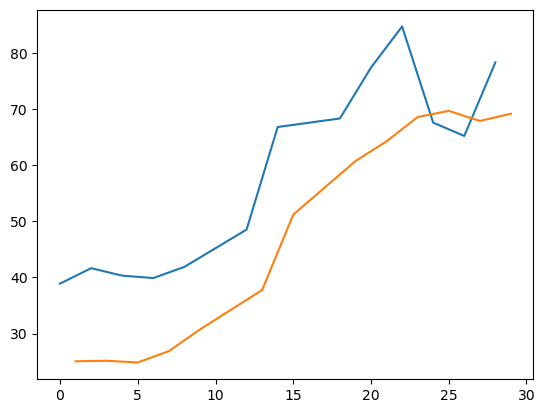

In [190]:
plt.plot(phage_sum_df[phage_sum_df["has"]]["phage_sum"])
plt.plot(phage_sum_df[~phage_sum_df["has"]]["phage_sum"])

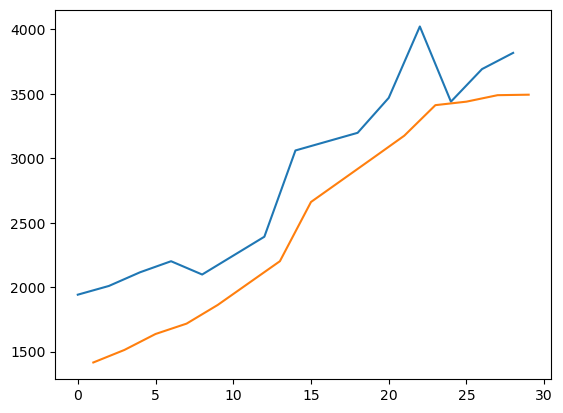

In [191]:
plt.plot(regular_sum_df[regular_sum_df["has"]]["CAG_sum"])
plt.plot(regular_sum_df[~regular_sum_df["has"]]["CAG_sum"])

In [130]:
corr_df[corr_df["has_colibactin"]]["phage_sum"].mean()

59.754752851711025

In [132]:
corr_df[~corr_df["has_colibactin"]]["phage_sum"].mean()

48.81031468531469

In [139]:
from scipy.stats import ranksums
ranksums(corr_df[corr_df["has_colibactin"]]["phage_sum"], corr_df[~corr_df["has_colibactin"]]["phage_sum"])

RanksumsResult(statistic=9.203558867486684, pvalue=3.462865509308879e-20)

ValueError: List of boxplot statistics and `positions` values must have same the length

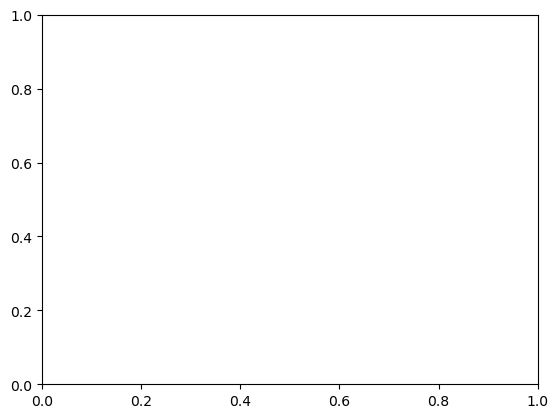

In [151]:
import matplotlib.pyplot as plt

plt.boxplot(corr_df["phage_sum"].values.flatten(), positions=corr_df["has_colibactin"].values.flatten() * 1)

In [195]:
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,has_colibactin,date_time
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,False,2016-12-10
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,False,2016-12-15
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,True,2016-12-15
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,True,2016-12-15
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,False,2016-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,False,2021-08-22
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,False,2021-09-06
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,False,2021-08-23


In [198]:
metadata["CAG richess"] = (CAG > 0).sum(axis=1)

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_19687/3919494651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["CAG richess"] = (CAG > 0).sum(axis=1)


In [210]:
in_both = list(set(df.index) & set(metadata.index))

In [211]:
tmp_metadata = metadata.copy().loc[in_both]
tmp_metadata["Species Richness"] = (df.loc[in_both] > 0).sum(axis=1)

In [215]:
tmp_metadata[["has_colibactin", "Species Richness"]].corr()

,has_colibactin,Species Richness
has_colibactin,1.000000,-0.079567
Species Richness,-0.079567,1.000000


In [224]:
metadata["phage_sum"] = corr_df["phage_sum"]

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_19687/1550242960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["phage_sum"] = corr_df["phage_sum"]


In [228]:
for p in metadata["Patient_No"].unique():
    display(metadata[metadata["Patient_No"] == p].sort_values("date_time")[["date_time", "has_colibactin", "phage_sum"]])
    input()

,date_time,has_colibactin,phage_sum
Sample_ID,,,
magic.0001,2016-12-10,False,36
magic.0010,2016-12-10,False,36
magic.0004,2016-12-15,False,38
magic.0519,2017-06-11,False,69
magic.0859,2017-09-10,True,92
magic.1142,2017-12-11,True,61
magic.1388,2018-02-14,True,41
magic.1574,2018-02-28,True,70
magic.1781,2018-04-09,True,69


,date_time,has_colibactin,phage_sum
Sample_ID,,,
magic.0006,2016-12-15,True,3
magic.0020,2016-12-21,False,17
magic.0018,2016-12-28,True,36
magic.0048,2017-01-04,True,34
magic.0078,2017-01-11,True,34
magic.0231,2017-03-14,True,41
magic.0527,2017-06-14,True,45
magic.0894,2017-09-19,True,49
magic.1115,2017-12-14,True,27


,date_time,has_colibactin,phage_sum
Sample_ID,,,
magic.0007,2016-12-15,True,77
magic.0008,2016-12-15,False,61
magic.0012,2016-12-22,False,67
magic.0017,2016-12-28,False,64
magic.0044,2017-01-04,True,69
magic.0064,2017-01-11,False,55
magic.0228,2017-03-15,True,65
magic.0541,2017-06-14,False,40
magic.0880,2017-09-15,False,46


KeyboardInterrupt: Interrupted by user